In [1]:
!pip install easyocr
!pip install imutils

  Using cached easyocr-1.5.0-py3-none-any.whl (70.8 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
     ---------------------------------------- 14.6/14.6 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 12.0/12.0 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 2.3 MB/s eta 0:00:00
  Using cached Pillow-9.2.0-cp310-cp310-win_amd64.whl (3.3 MB)
     -------------------------------------- 151.7/151.7 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 162.3/162.3 MB 1.4 MB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ---------------------------------------- 2.0/2.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 4.2

In [130]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

(-0.5, 714.5, 649.5, -0.5)

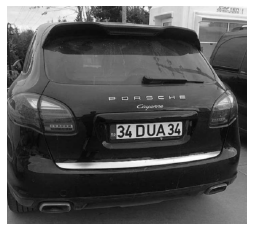

In [182]:
#image path
img = cv2.imread("resim1.jpg")
#img = cv2.resize(img, (600,500))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [183]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

(-0.5, 714.5, 649.5, -0.5)

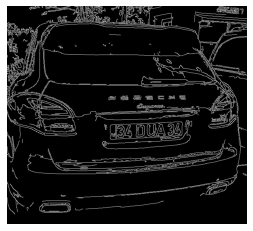

In [184]:
filter = cv2.bilateralFilter(gray, 11, 17, 17) #Edge-preserving, and noise-reducing smoothing filter for images
edged = auto_canny(filter) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [185]:
#find contours in the image, keeping only the largest ones
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [186]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) 
    if len(approx) == 4:
        location = approx
        break     

In [187]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

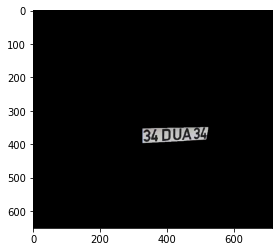

In [188]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [189]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

(-0.5, 196.5, 47.5, -0.5)

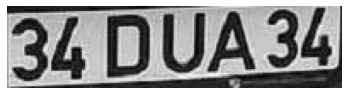

In [190]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [191]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [197, 0], [197, 48], [0, 48]], '34DUA34', 0.9838137599530759)]

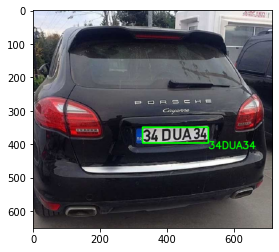

In [201]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))